# DVA263 - Applied Machine Learning

### Exercise

This exercise involves the development of an Convolutional Neural Network (CNN) that classifies handwritten digits from the MNIST dataset. The task will require preprocessing the data, constructing the network, and then training the model to recognize digit images.

<span style="color:red">Note:</span>
Please make sure that the system have following packages installed before doing the exercise.
* Numpy
* Tensorflow
* Scikit-learn
* Matplotlib
* Seaborn

# *Libraries*

Libraries have already been declared. Please declare any additional libraries needed.

In [19]:
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# *Load the MNIST Dataset*

The MNIST dataset consists of 60,000 images for training and 10,000 images for testing, all of which contain handwritten digits.

In [20]:
# This function is for loading the MNIST handwritten dataset.
# You do not have to change anything.

def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    return x_train, y_train, x_test, y_test

# *Plot First Ten Images*

Plotting images will help to understand the how each image looks like

In [21]:
# This function is for visualize first 10 image.
# You do not have to change anything.

def plot_first_ten_images(images, labels):
    fig, axes = plt.subplots(1, 10, figsize=(20, 2))
    for i in range(10):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis('off')
    plt.show()

# *Prepare Final Data*

Prepare the dataset for model training and testing.

In [22]:
def prepare_data(x_train, y_train, x_test, y_test): # Insert parameters name 
    
    # Please perform following tasks to prepare final data
    
    
    """------------ Task 1 - Normalization -------------
    Instruction:
        - Normalize the pixel values of the images from the range [0, 255] to [0, 1] for both training and test sets. 
        - This is done by dividing by the maximum value of a pixel, which is 255.
        - Store the normalized data in "x_train" and "x_test".
    """
    x_train = x_train/255
    x_test = x_test/255

    """------------- Task 2 - Reshape Images -----------
     Instruction:
        - Reshape the images to include a channel dimension, going from (28, 28) to (28, 28, 1),
        - because the CNN expects three-dimensional inputs (height, width, channels).
        - Store the reshaped data again in "x_train" and "x_test".
    """
    # Write code here----

    
    """------------- Task 3 - One-Hot Encoding ----------
    Instruction:
        - Convert the categorical integer labels into a binary matrix representation using one-hot encoding.
        - This step is crucial for classification tasks to properly format the labels for the output layer of the network.
        - Store the one-hot encoding data in "y_train" and "y_test".
    """
    encoder = OneHotEncoder(sparse_output=False)
    y_train = encoder.fit_transform(y_train.reshape(-1, 1))
    y_test = encoder.transform(y_test.reshape(-1, 1))

    """--------- Task 4 - After these preprocessing steps, the function will return four variables---------
        - "x_train": the reshaped training features
        - "y_train": the one-hot encoded training labels
        - "x_test": the reshaped testing features
        - "y_test": the one-hot encoded testing labels
    """
    return  x_train, y_train, x_test, y_test

# *Build CNN Model*

Build the CNN model using hidden layers. 

In [23]:
"""---- Task - Define your Convolutional Neural Network (CNN) Architecture inside the "build_cnn_model()" function----

Instruction:
    - Use the Sequential model from Keras to stack layers in a linear format.
    - Start with convolutional layer where 'input_shape' should be set to (28, 28, 1) to match the shape of the MNIST images.
    - It's ideal to start with a kernel filter size of (3, 3) and explore using more filters as needed.
    - Use necessary activation function in each layer.
    - Use max pooling layers to reduce the spatial dimensions of your output volume after the convolutional layers.
    - Use a flatten layer to transform the 2D feature maps into a 1D feature vector before feeding it into the dense layer.
    - Continue adding dense layers reducing the number of neurons in each subsequent layer.
    - Apply L2 regularization if necessary to the layer to help prevent overfitting during training.
    - Add dropout after dense layers if necessary to further prevent overfitting during training.
    - Finish with a Dense output layer with 10 units and a 'softmax' activation to handle the multi-class classification, 
    - where each unit corresponds to one of the ten classes of the MNIST digits (0-9).
""" 

def build_cnn_model():
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(rate=0.3))
    model.add(Dense(10, activation='softmax'))
    
    return model

# *Compile and Train the Model*

Compile and traning the build model. 

In [24]:
"""------Compile and train the model by using the "compile_and_train()" function.------ 
Instruction:
    - The function consits of three tasks where one is optional.
    - We appriciate if you perform the optional task.
    - Task 1 related to use of compile function. It has few hyperparametrs those are important
    - to configure the learning process of the model.
    - Task 2 related to use of fit function. It has few hyperparametrs those are important to train the model using dataset.
    - In the Task optional, "callbacks[]" used to perform actions such as saving the model weights,
    - logging training metrics, or stopping the training process early if the model is not improving.
"""

def compile_and_train(model, x_train, y_train): # Insert parameters name 
    
    """----- Optional Task - Declare callbacks.-----
    Instruction:
        - Uncomment "callbacks[]" if it is necessary.
        - Use only "EarlyStopping()" or "ReduceLROnPlateau()" or both functions.
        - Write necessary hyperparameters inside the function.
    """
    # Write code here----
    
    
    # End optional task

    """----- Task 1 - Compile Function.------
    Instruction:
        - Use compile function write all the necessary hyperparameters inside the complie function.
        - For example "model.compile()" where "model" already build using "build_model()" fucntion.
    """
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    """----- Task 2 - Fit Function.------
    Instruction:
        - Use fit function and write all the necessary hyperparameters inside the fit function.
        - For example "model.fit()" where "model" already build using "build_model()" fucntion.
        - Store the results after fitting the model in "history".
        - Don't forget to split the dataset for validation.
    """
    model.fit(x=x_train,y=y_train,epochs=20,validation_split=0.2)
    
    
    return model.history

# *Plotting Training and Validation Figures*

Plot the training and validation loss and accuracy figures

In [25]:
# "plot_metrics()" function help to plot loss and accuracy figure of the training and validation.

def plot_metrics(history): # Insert parameter name 
    
    # Plot traning and validation loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    
    # Plot traning and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

# *Evaluate the Model and Plot the Confusion Matrix*

In [26]:
# "evaluate_and_confusion_matrix()" function display the evalutaion result after training and testing the model. 

def evaluate_and_confusion_matrix(model, x_train, y_train, x_test, y_test): # Insert parameters name 
    
    # Predictions for the training set
    y_train_pred = model.predict(x_train)
    y_train_pred_classes = np.argmax(y_train_pred, axis=1)
    y_true_train = np.argmax(y_train, axis=1)

    # Predictions for the test set
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calculate and print the training and test accuracy
    train_accuracy = accuracy_score(y_true_train, y_train_pred_classes)
    test_accuracy = accuracy_score(y_true, y_pred_classes)
    print(f"Train accuracy: {train_accuracy:.4f}")
    print(f"Test accuracy: {test_accuracy:.4f}")

    # Calculate and print the F1 score for the test set
    f1 = f1_score(y_true, y_pred_classes, average='weighted')
    print(f"Test F1 Score: {f1:.4f}")

    # Plot the confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


# *Main Section*

The main section is responsible for calling all the functions, each of which has specific tasks to perform.

In [27]:
# --------------------------------------This is the main section------------------------------

"""----- Task 1: Dataset loading------

Instruction:
    - Call the "load_data()" function to load the MNIST dataset. 
    - This function returns two tuples: one for the training data and another for the testing data.
    - Each tuple contains a set of images and their corresponding labels.
    - Store the images and labels in the following variables:
    - x_train: training images
    - y_train: training labels
    - x_test: testing images
    - y_test: testing labels
"""
x_train, y_train, x_test, y_test = load_data()

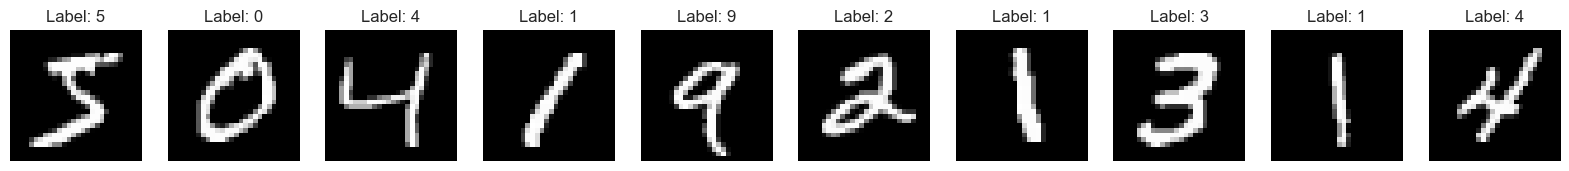

In [28]:

"""----- Task 2: First 10 Images Visualization------
Instruction:
    - Call the "plot_first_ten_images()" function to display the first ten images from the dataset.
    - This function takes two arguments:
    - 'images': a collection of image data, usually as an array where each element is an image.
    - 'labels': the corresponding labels for each image, indicating the class or category of the image.
    - The function creates a 1x10 grid of subplots, where each subplot will display one of the first ten images
    - in 'grayscale' and title it with its corresponding label.
"""
plot_first_ten_images(x_train, y_train)

In [29]:
"""----- Task 3: Prepare Datset--------
Instruction:
    - Call the "prepare_data()" function to perform preprocessing on the training and test datasets.
    - This function will execute feature extraction, normalization, flattening, and one-hot encoding of labels.
    - The output will be the prepared dataset, ready for training a neural network.
    - You will receive four variables as a result:
    - "x_train_flat": Training data features, flattened for the neural network input.
    - "y_train_encoded": Training data labels, one-hot encoded.
    - "x_test_flat": Test data features, similarly flattened.
    - "y_test_encoded": Test data labels, one-hot encoded.
"""
x_train, y_train, x_test, y_test = prepare_data(x_train, y_train, x_test, y_test)

"""----- Task 4: Build the model------
Instruction:
    - Call the "build_model()" function to initialize your artificial neural network model.
    - The model returned is ready to be compiled and trained with your dataset.
"""
model = build_cnn_model()



"""----- Task 5: Compile and Train------
Instruction:
    - Call the "compile_and_train()" function to compile and train your neural network model.
    - The function requires three arguments:
    - 'model': The ANN model you previously built with the "build_model()" function.
    - 'x_train_flat': The flattened feature data from your training set, prepared for neural network input.
    - 'y_train_encoded': The one-hot encoded labels from your training set.
    - This function will first compile the model with the necessary configurations and then fit the model on the training data.
    - The output "history" object will contain information about the training process, such as loss and accuracy for each epoch.
    - Execute the following line of code to start the compilation and training process:
"""
history = compile_and_train(model,x_train,y_train)

Epoch 1/20


C:\Users\nicol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8590 - loss: 0.4484 - val_accuracy: 0.9822 - val_loss: 0.0590
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9738 - loss: 0.0870 - val_accuracy: 0.9871 - val_loss: 0.0473
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9816 - loss: 0.0620 - val_accuracy: 0.9869 - val_loss: 0.0438
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9843 - loss: 0.0498 - val_accuracy: 0.9895 - val_loss: 0.0389
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9863 - loss: 0.0420 - val_accuracy: 0.9891 - val_loss: 0.0402
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9884 - loss: 0.0360 - val_accuracy: 0.9892 - val_loss: 0.0402
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9901 - loss: 0.0309 - val_accuracy: 0.9892 - val_loss: 0.0420
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9905 - loss: 0.0281 - val_ac

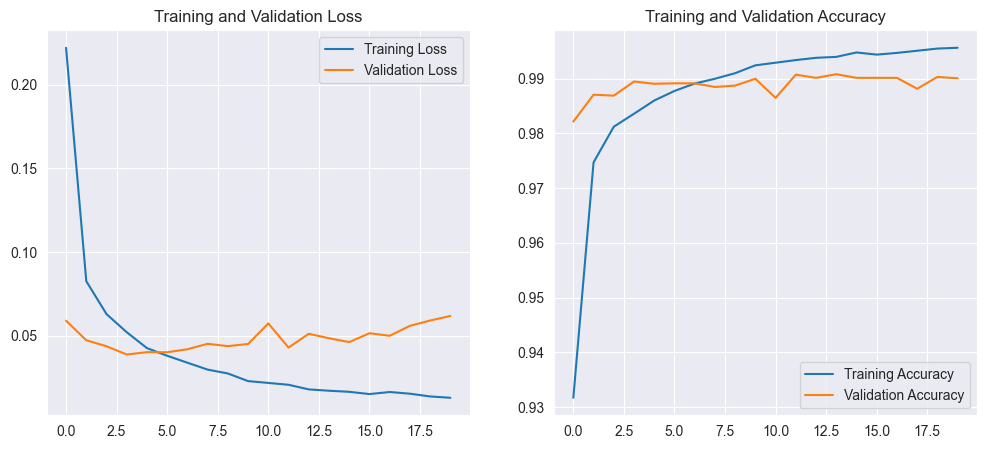

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Train accuracy: 0.9976
Test accuracy: 0.9910
Test F1 Score: 0.9910


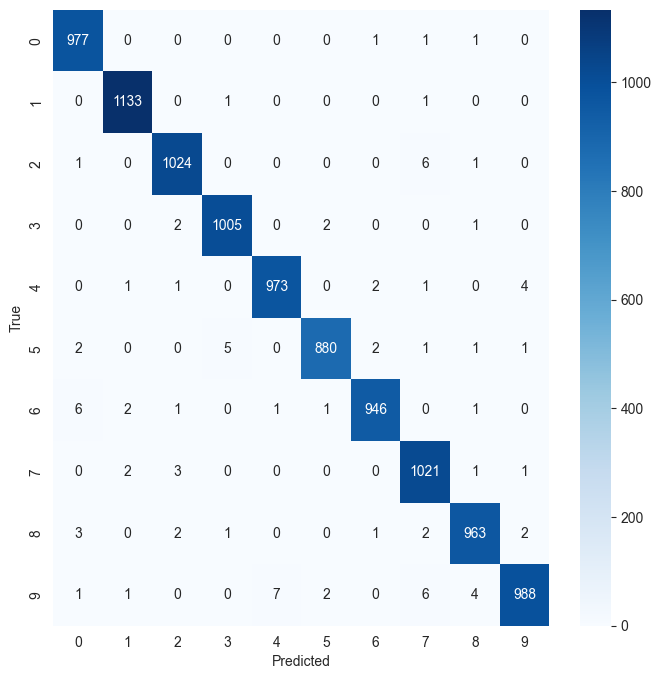

In [30]:

"""----- Task 6: Plotting Training Metrics------
Instruction:
    - Call the "plot_metrics()" function to visualize the training and validation metrics.
    - Pass the 'history' object, which contains the training history of the model, as an argument to the function.
    - This function will generate plots for both the loss and accuracy of the model during training.
    - It helps to assess the model's performance and to identify if the model is overfitting or underfitting.
"""
plot_metrics(history)

"""----- Task 7: Model Evaluation and Confusion Matrix Visualization-----
Instruction:
    - Call the "evaluate_and_confusion_matrix()" function to evaluate the model's performance on both the training and testing data.
    - This function will also plot the confusion matrix for the test data, providing insight into the model's classification accuracy across different classes.
    - The function takes the following parameters:
       - 'model': The trained ANN model.
       - 'x_train_flat': The flattened training data features.
       - 'y_train_encoded': The one-hot encoded training data labels.
       - 'x_test_flat': The flattened testing data features.
       - 'y_test_encoded': The one-hot encoded testing data labels.
    - After execution, the function will display the training and test accuracy and plot the confusion matrix.
"""
evaluate_and_confusion_matrix(model,x_train,y_train,x_test,y_test)

